In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import os
print(os.listdir(r"C:\Users\Trupt\OneDrive\Desktop\ML 3 Research Paper of House Price Prediction\Implementation\Case 1 1702692\kc_house_data.csv"))
import warnings  
warnings.filterwarnings('ignore')

['kc_house_data.csv']


In [2]:
dataset=pd.read_csv(r"C:\Users\Trupt\OneDrive\Desktop\ML 3 Research Paper of House Price Prediction\Implementation\Case 1 1702692\kc_house_data.csv\kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


In [5]:
dataset = dataset.drop(['id','date'],axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df1=pd.DataFrame(dataset, columns=["id","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"])

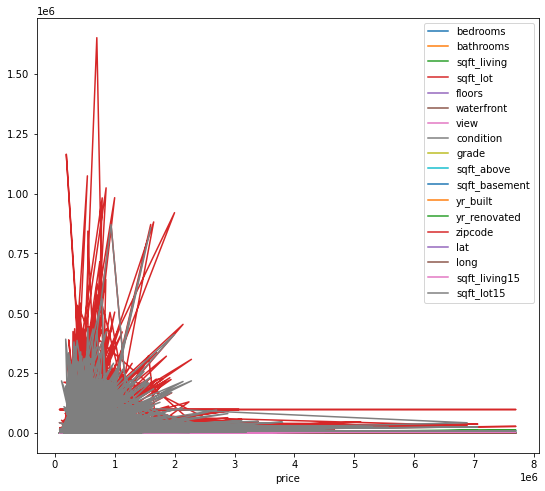

In [10]:
df1.plot(x="price",y=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], kind="line",figsize=(9,8))
plt.show()

In [11]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [17]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [18]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)
xgb_pred = xgb.predict(X_test)
xgb_score=xgb.score(X_test,y_test)
expl_xgb=explained_variance_score(xgb_pred,y_test)

In [22]:
from sklearn import svm
svm=svm.SVR()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
svm_pred =svm.predict(X_test)
svm_score=svm.score(X_test,y_test)
expl_svm = explained_variance_score(svm_pred,y_test)

In [23]:
from sklearn import metrics
print("Using Multiple Linear Regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_mlr))
print('MSE:', metrics.mean_squared_error(y_test, pred_mlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_mlr)))

Using Multiple Linear Regression
MAE: 124034.75533299005
MSE: 42863880415.46242
RMSE: 207035.93991252442


In [24]:
from sklearn import metrics
print("Using Desicion Tree Regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_tr))
print('MSE:', metrics.mean_squared_error(y_test, pred_tr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_tr)))

Using Desicion Tree Regression
MAE: 99906.86983343615
MSE: 34375137938.74082
RMSE: 185405.33417013875


In [25]:
from sklearn import metrics
print("Using Random Forest Regression")
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Using Random Forest Regression
MAE: 68447.10395461932
MSE: 16459975439.344482
RMSE: 128296.43580140674


In [26]:
from sklearn import metrics
print("Using XGBooster Regression")
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Using XGBooster Regression
MAE: 65739.48468586135
MSE: 14711238693.452904
RMSE: 121289.89526524006


In [28]:
from sklearn import metrics
print("Using SVM Regression")
print('MAE:', metrics.mean_absolute_error(y_test, svm_pred))
print('MSE:', metrics.mean_squared_error(y_test, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

Using SVM Regression
MAE: 221528.6055570415
MSE: 145175304733.291
RMSE: 381018.77215340844


In [35]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
print("XGBooster Regression Model Score is ",round(xgb.score(X_test,y_test)*100))
print("SVM Model Score is ",round(svm.score(X_test,y_test)*100))
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','XGBooster Regression', 'SVM'],
                            'Score':[mlr_score,decision_score,rf_score,xgb_score,svm_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf,expl_xgb,expl_svm]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  69
Decision tree  Regression Model Score is  75
Random Forest Regression Model Score is  88
XGBooster Regression Model Score is  89
SVM Model Score is  -6


,Model,Score,Explained Variance Score
3,XGBooster Regression,0.892847,8.695644e-01
2,Random forest Regression,0.880110,8.462478e-01
1,Decision Tree,0.749620,7.307127e-01
0,Multiple Linear Regression,0.687790,5.275283e-01
4,SVM,-0.057420,-3.175840e+07
